From 이수안 컴퓨터: http://suanlab.com/youtube/ml.html

# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다
  * ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import multiprocessing
plt.style.use(['seaborn-whitegrid'])

from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline, Pipeline

In [2]:
seed = 2022
np.random.seed(seed)

## 분류를 위한 데이터

### 붓꽃 데이터

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### 와인 데이터

In [6]:
wine = load_wine()

In [7]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['Target'] = wine.target

### 유방암 데이터

In [8]:
cancer = load_breast_cancer()

In [9]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['class'] = cancer.target

In [10]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 회귀를 위한 데이터

### 보스턴 주택 가격 데이터

In [11]:
boston = load_boston()

In [12]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 당뇨병 데이터

In [14]:
diabetes = load_diabetes()

In [15]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['Target'] = diabetes.target

In [16]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## 분류 - `DecisionTreeClassifier()`

* `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
* 두개의 배열 X, y를 입력 받음
  * X는 [n_samples, n_features] 크기의 데이터 특성 배열
  * y는 [n_samples] 크기의 정답 배열

In [17]:
X = [[0,0], [1,1], [2,2]]
y = [0,2,0]

model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [18]:
model.predict([[2.0, 2.0]])

array([0])

In [19]:
model.predict_proba([[1.0, 3.0]])

array([[1., 0.]])

### 붓꽃 데이터 학습

#### 교차검증

##### 전처리 없이 학습

In [20]:
model = DecisionTreeClassifier()
cross_val_score(estimator=model,
                X=iris.data, y=iris.target,
                cv=5, n_jobs=multiprocessing.cpu_count(),
                verbose=1
               )

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   11.3s finished


array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

##### 전처리 후 학습
* 결정 트리는 <span style='color:red'>규칙을 학습</span>하기 때문에 전처리에 큰 영향을 받지 않는다.

In [21]:
model = make_pipeline(StandardScaler(),
                      DecisionTreeClassifier())

In [22]:
cross_val_score( estimator=model,
               X = iris.data, y=iris.target,
               cv=5,
               n_jobs=multiprocessing.cpu_count(),
               verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

#### 학습된 결정 트리 시각화

In [23]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [24]:
r = tree.export_text(decision_tree=model,
                        feature_names=iris.feature_names)

print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



##### plot_tree를 사용한 시각화

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

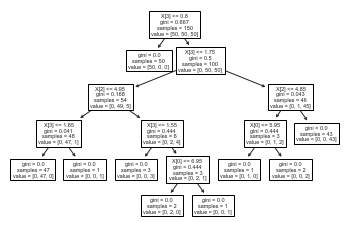

In [25]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

In [26]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

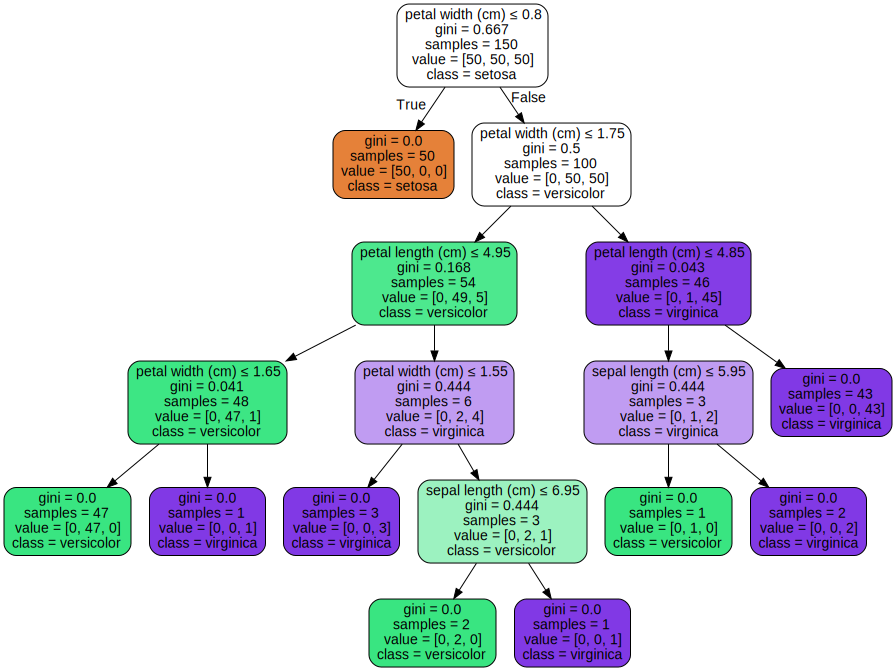

In [27]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [28]:
print("특성 중요도:\n{}".format(model.feature_importances_))

특성 중요도:
[0.02666667 0.         0.05072262 0.92261071]


#### 시각화

In [29]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

##### 결정 경계 시각화

(0.0, 7.88, -0.9, 3.4800000000000044)

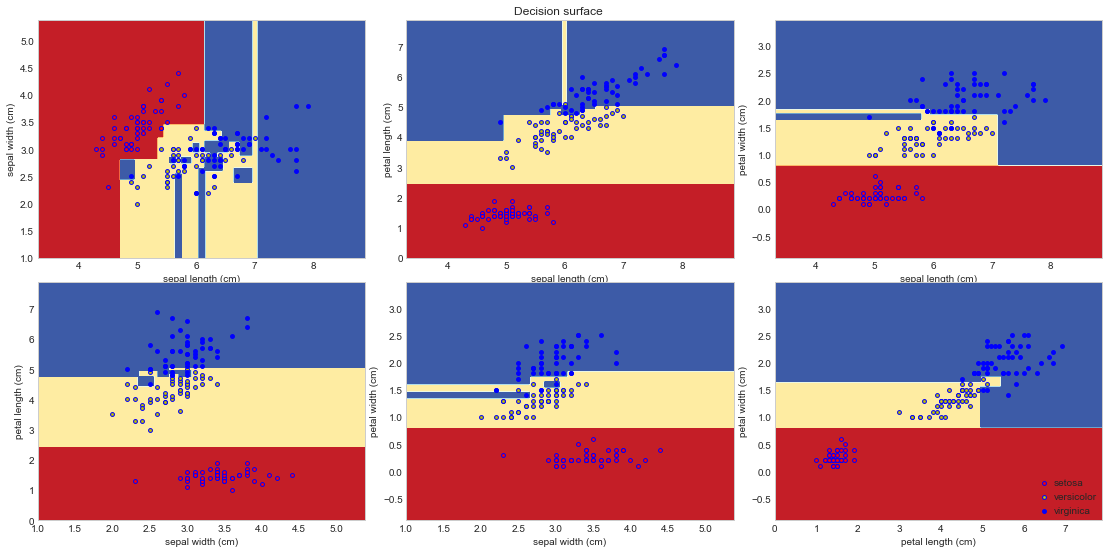

In [30]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0, 2], [0, 3],
                               [1,2], [1,3], [2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    model = DecisionTreeClassifier()
    model = model.fit(X,y)
    
    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y ==i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label = iris.target_names[i],
                   cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(0.0, 7.88, -0.9, 3.4800000000000044)

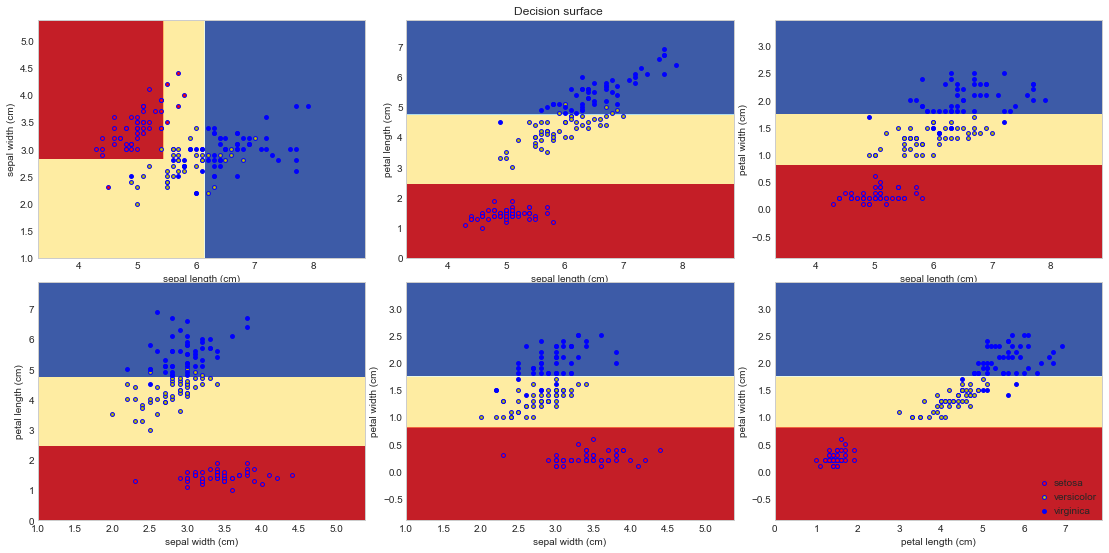

In [31]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0, 2], [0, 3],
                               [1,2], [1,3], [2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    model = DecisionTreeClassifier(max_depth=2) # change value here. to prevent overfitting
    model = model.fit(X,y)
    
    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y ==i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label = iris.target_names[i],
                   cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

In [32]:
print("특성 중요도:\n{}".format(model.feature_importances_))

특성 중요도:
[0. 1.]


In [33]:
model.get_depth

<bound method BaseDecisionTree.get_depth of DecisionTreeClassifier(max_depth=2)>

### 와인 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [34]:
model = DecisionTreeClassifier()

cross_val_score(estimator=model,
                     X = wine.data, y=wine.target,
                     cv =5, n_jobs=multiprocessing.cpu_count(),
                     verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.91666667, 0.80555556, 0.94444444, 0.91428571, 0.85714286])

##### 전처리 후 학습

In [35]:
model = make_pipeline(StandardScaler(),
                     DecisionTreeClassifier())

cross_val_score(estimator=model,
               X=wine.data, y=wine.target,
               cv=5, n_jobs=multiprocessing.cpu_count(),
               verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.91666667, 0.80555556, 0.83333333, 0.91428571, 0.82857143])

#### 학습된 결정 트리 시각화

In [36]:
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [37]:
r = tree.export_text(decision_tree=model,
                    feature_names=wine.feature_names)

print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- flavanoids <= 0.56
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  0.56
|   |   |   |   |--- class: 1
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- color_intensity <= 4.06
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- color_intensity >  4.06
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- color_intensity <= 3.61
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.61
|   |   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- magnesi

##### plot_tree를 사용한 시각화

[Text(189.42631578947368, 199.32, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(114.53684210526316, 163.07999999999998, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(70.48421052631579, 126.83999999999999, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(35.242105263157896, 90.6, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(17.621052631578948, 54.359999999999985, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(52.863157894736844, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(105.72631578947369, 90.6, 'X[6] <= 0.565\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(88.10526315789474, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(123.34736842105264, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(158.58947368421053, 126.83999999999999, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 6

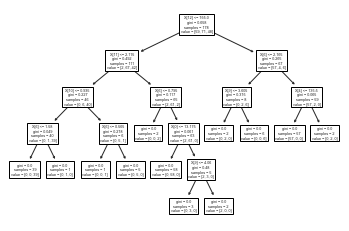

In [38]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

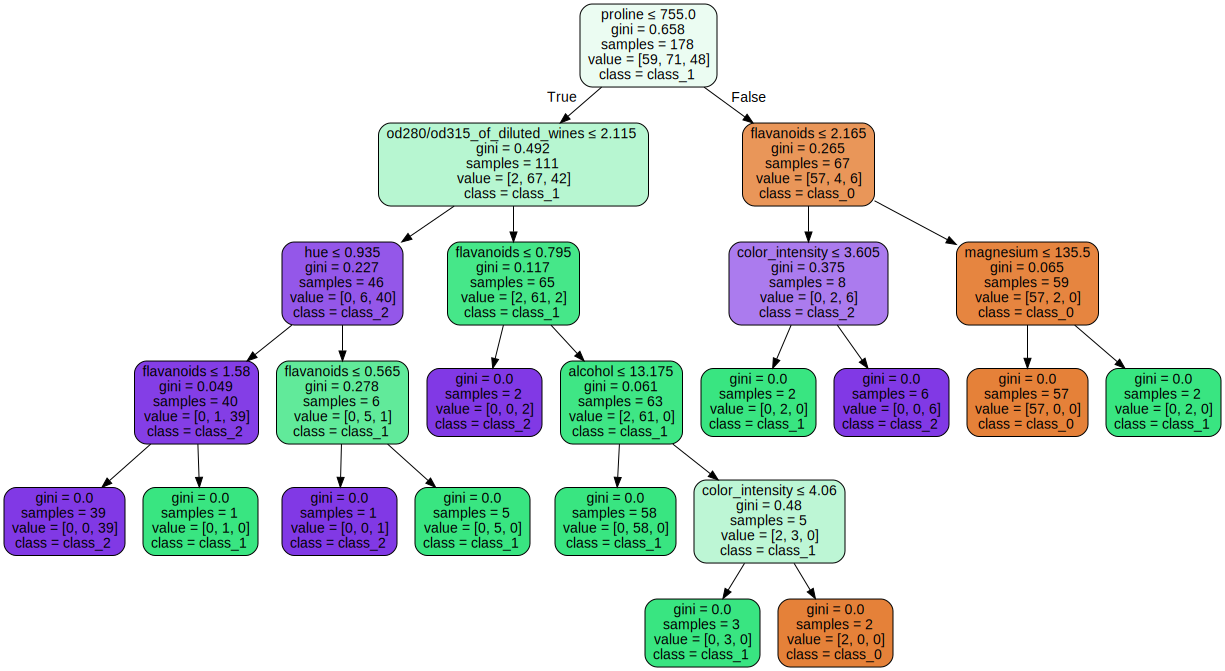

In [39]:
dot_data = tree.export_graphviz(decision_tree=model,
                               feature_names=wine.feature_names,
                               class_names=wine.target_names,
                               filled=True, rounded=True,
                               special_characters=True)

graph = graphviz.Source(dot_data)
graph

#### 시각화

In [40]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

##### 결정 경계 시각화

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

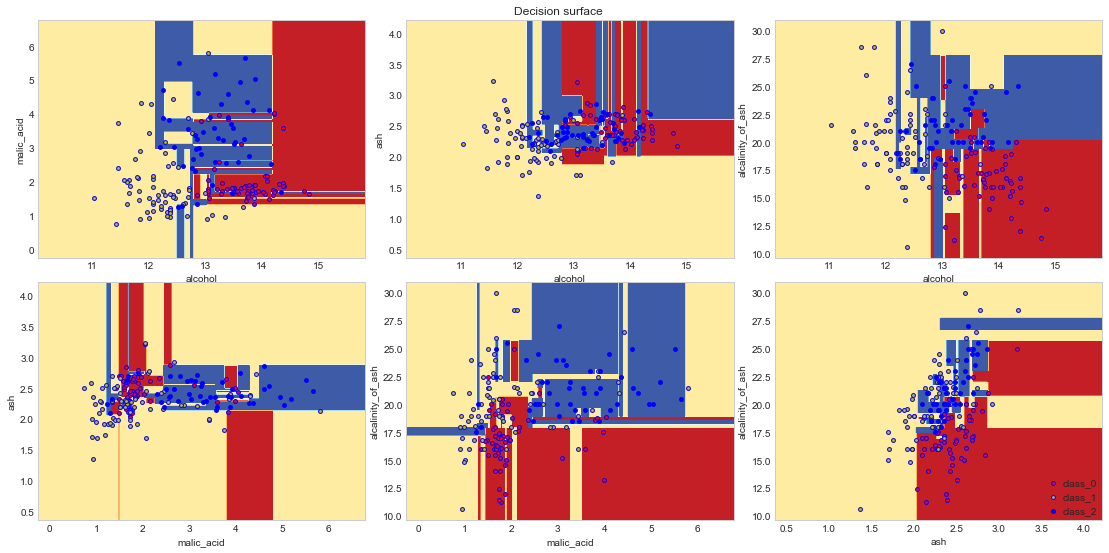

In [41]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0, 2], [0, 3],
                               [1,2], [1,3], [2,3]]):
    X = wine.data[:, pair]
    y = wine.target
    
    model = DecisionTreeClassifier()
    model = model.fit(X,y)
    
    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y ==i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label = wine.target_names[i],
                   cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

depth 조정하여 plotting

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

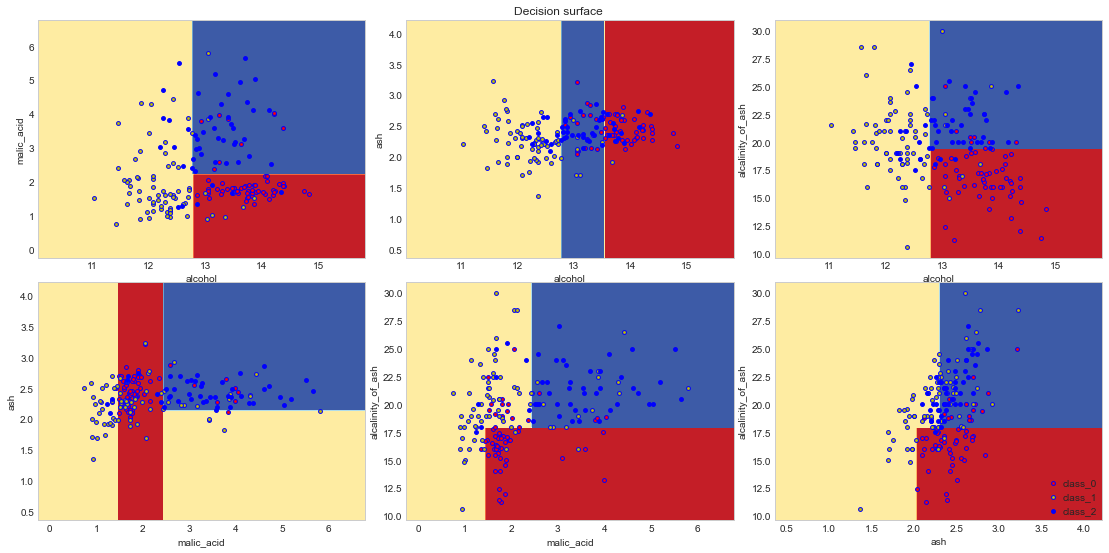

In [42]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0, 2], [0, 3],
                               [1,2], [1,3], [2,3]]):
    X = wine.data[:, pair]
    y = wine.target
    
    model = DecisionTreeClassifier(max_depth=2)
    model = model.fit(X,y)
    
    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y ==i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label = wine.target_names[i],
                   cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 유방암 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [43]:
model = DecisionTreeClassifier()

cross_val_score(estimator=model,
               X=cancer.data, y=cancer.target,
               cv=5, n_jobs=multiprocessing.cpu_count(),
               verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.90350877, 0.92982456, 0.9122807 , 0.96491228, 0.89380531])

##### 전처리 후 학습

In [44]:
model = make_pipeline(StandardScaler(),
                     DecisionTreeClassifier())

cross_val_score(estimator=model,
               X=cancer.data, y=cancer.target,
               cv=5, n_jobs=multiprocessing.cpu_count(),
               verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.9122807 , 0.90350877, 0.92105263, 0.95614035, 0.90265487])

#### 학습된 결정 트리 시각화

In [45]:
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [46]:
r = tree.export_text(decision_tree=model)

print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_12 <= 6.60
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_26 <= 0.19
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_26 >  0.19
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_10 >  0.42
|   |   |   |   |   |--- feature_5 <= 0.06
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  0.06
|   |   |   |   |   |   |--- class: 1
|   |   |--

##### plot_tree를 사용한 시각화

[Text(209.25, 203.85, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(136.01250000000002, 176.67000000000002, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(78.46875, 149.49, 'X[12] <= 6.597\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(68.00625000000001, 122.31, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(41.85, 95.13, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(20.925, 67.94999999999999, 'X[26] <= 0.195\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(10.4625, 40.77000000000001, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(31.387500000000003, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(62.775000000000006, 67.94999999999999, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(52.3125, 40.77000000000001, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(73.2375, 40.77000000000001, 'X[21] <= 33.56\ngini = 0.095\ns

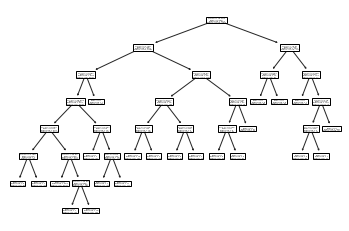

In [47]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

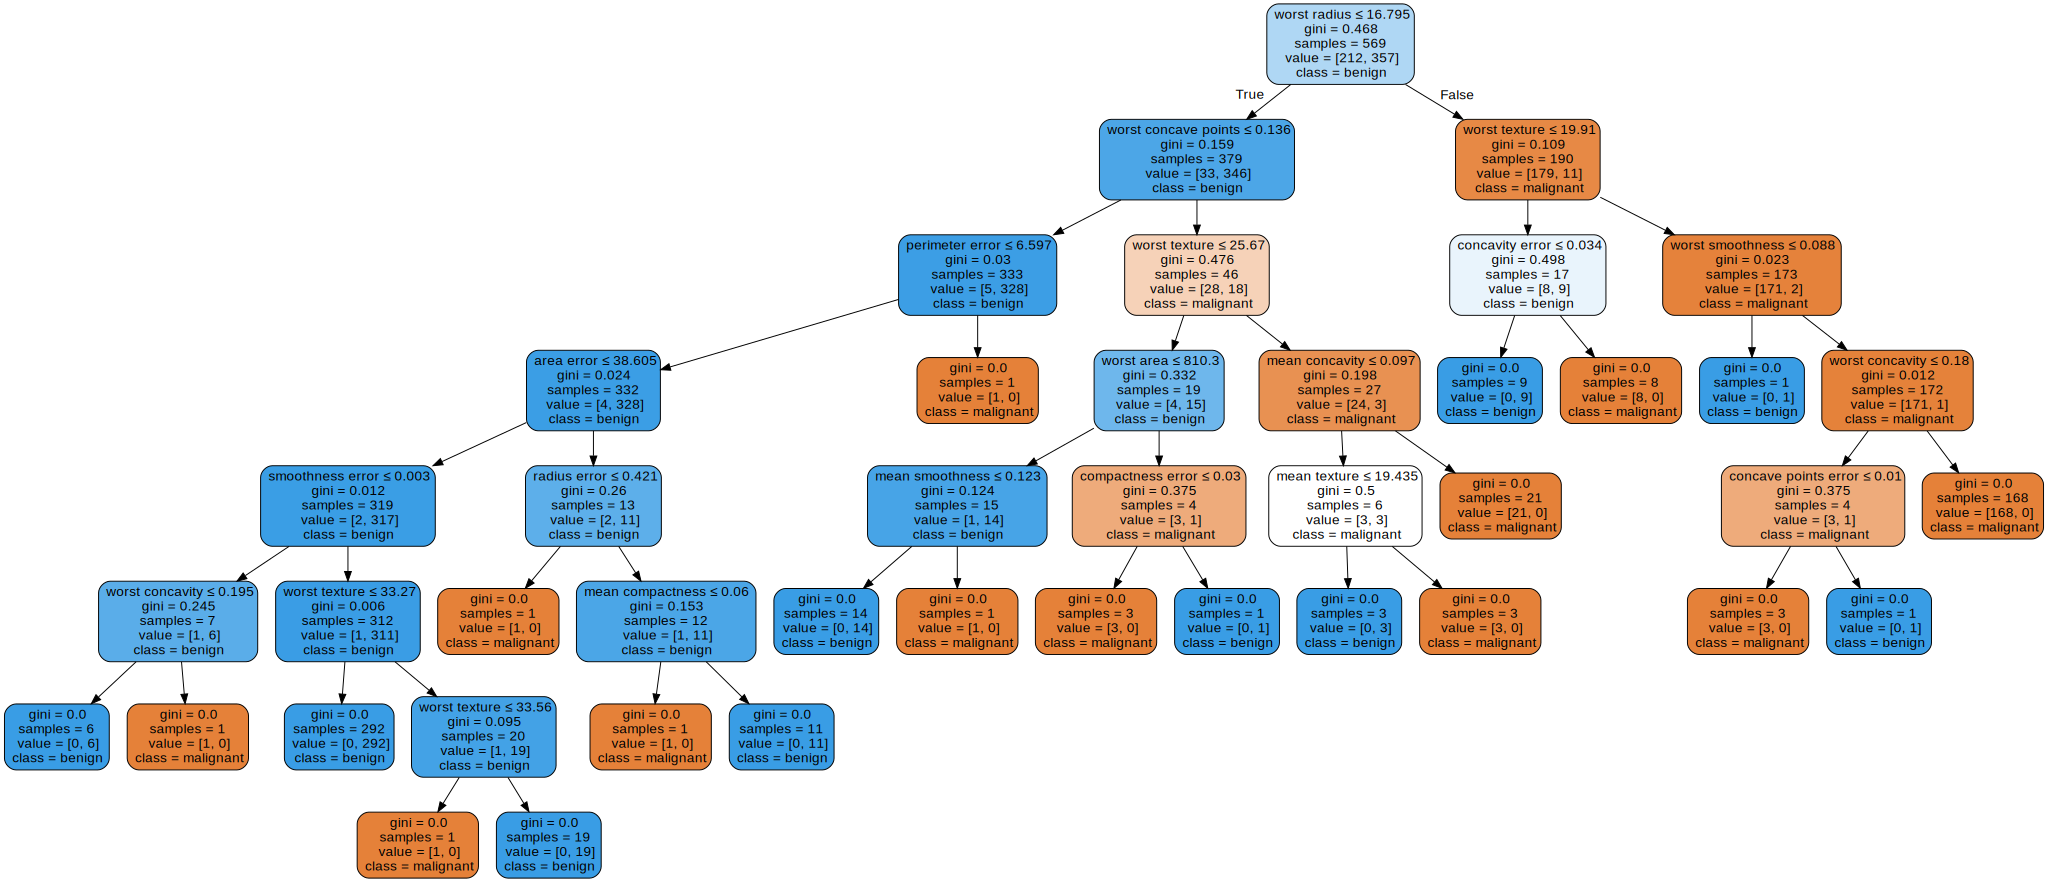

In [48]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=cancer.feature_names,
                                class_names=cancer.target_names,
                                filled = True, rounded=True,
                                special_characters=True )

graph = graphviz.Source(dot_data)
graph

#### 시각화

In [49]:
n_classes = 2
plot_colors= 'ryb'
plot_step = 0.02

##### 결정 경계 시각화

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

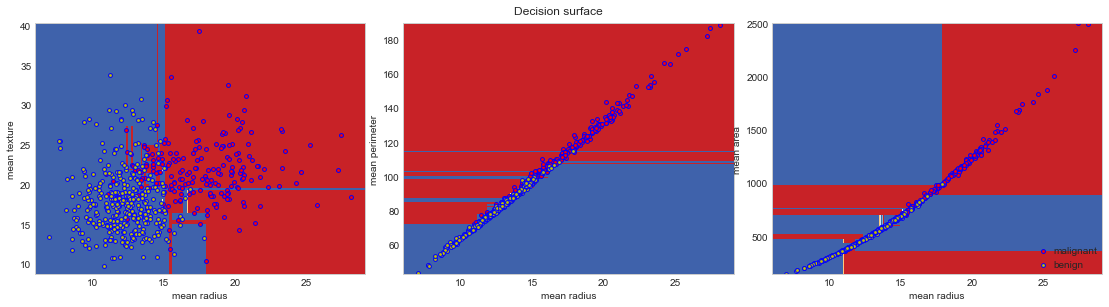

In [50]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0, 2], [0, 3]]):
    X = cancer.data[:, pair]
    y = cancer.target
    
    model = DecisionTreeClassifier()
    model = model.fit(X,y)
    
    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y ==i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label = cancer.target_names[i],
                   cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

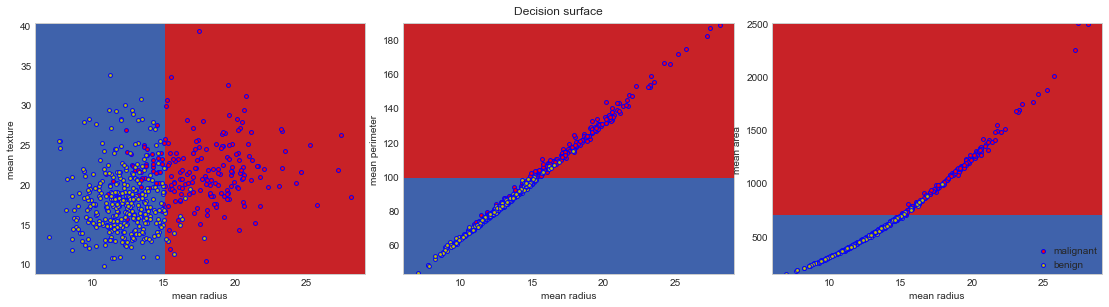

In [51]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0, 2], [0, 3]]):
    X = cancer.data[:, pair]
    y = cancer.target
    
    model = DecisionTreeClassifier(max_depth=2)
    model = model.fit(X,y)
    
    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y ==i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label = cancer.target_names[i],
                   cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

## 회귀 - `DecisionTreeRegressor()`

### 보스턴 주택 가격 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [52]:
model = DecisionTreeRegressor()

cross_val_score(estimator=model,
               X = boston.data, y=boston.target,
               cv=5, n_jobs=multiprocessing.cpu_count(),
               verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.4s finished


array([ 0.66630234,  0.61242506,  0.63657313,  0.41102826, -0.766975  ])

##### 전처리 후 학습

In [53]:
model = make_pipeline(StandardScaler(),
                     DecisionTreeRegressor())

In [54]:
cross_val_score(estimator=model,
               X = boston.data, y=boston.target,
               cv=5, n_jobs=multiprocessing.cpu_count(),
               verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


array([ 0.60560268,  0.40869165,  0.67902562,  0.39257675, -1.00495639])

#### 학습된 결정 트리 시각화

In [55]:
model = DecisionTreeRegressor()
model.fit(boston.data, boston.target)

DecisionTreeRegressor()

##### 텍스트를 통한 시각화

In [56]:
print(tree.export_text(model))

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_12 <= 10.83
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_12 >  10.83
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- feature_9 >  222.50
|   |   |   |   |   |   |--- feature_2 <= 5.48
|   |   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |   |--- feature_11 <= 393.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 6.22
|   |   |   |   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  6.22
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- featur

##### plot_tree를 사용한 시각화

[Text(226.5478925506162, 212.004, 'X[5] <= 6.941\nmse = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(140.53719355193664, 201.132, 'X[12] <= 14.4\nmse = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(62.02009132922535, 190.26, 'X[7] <= 1.385\nmse = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(34.863948063380285, 179.388, 'X[12] <= 10.83\nmse = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(34.23521566901409, 168.516, 'mse = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(35.49268045774648, 168.516, 'mse = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(89.17623459507043, 179.388, 'X[5] <= 6.543\nmse = 14.885\nsamples = 250\nvalue = 22.905'),
 Text(36.75014524647887, 168.516, 'X[12] <= 7.57\nmse = 8.39\nsamples = 195\nvalue = 21.63'),
 Text(13.665105633802817, 157.644, 'X[9] <= 222.5\nmse = 3.015\nsamples = 43\nvalue = 23.97'),
 Text(13.036373239436621, 146.772, 'mse = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(14.293838028169015, 146.772, 'X[2] <= 5.48\nmse = 2.541\nsamples = 42\nvalue = 23.857'),
 Text(9

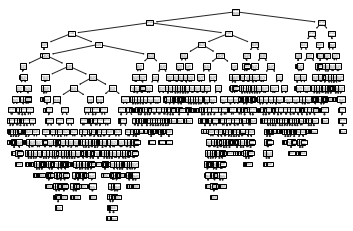

In [57]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

In [58]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

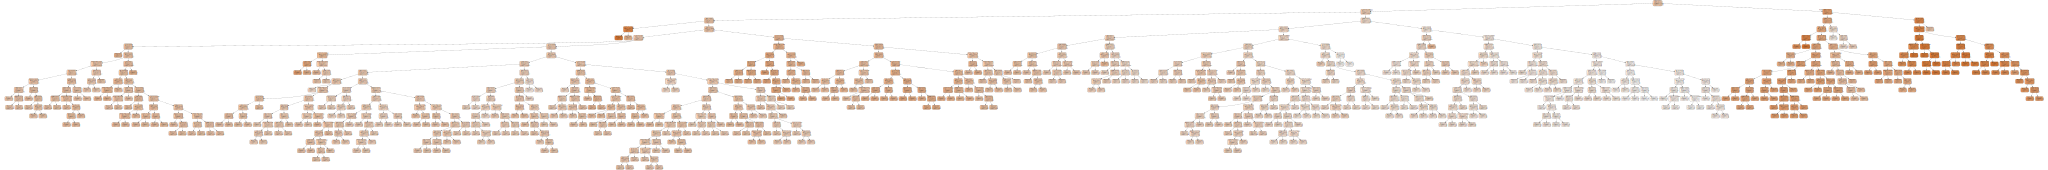

In [59]:
dot_data = tree.export_graphviz(decision_tree=model,
                               feature_names=boston.feature_names,
                               class_names='target',
                               filled=True, rounded=True,
                               special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [60]:
print("특성 중요도:\n{}".format(model.feature_importances_))

특성 중요도:
[6.11902583e-02 5.09208992e-04 2.73131875e-03 1.12031615e-03
 2.64462053e-02 5.75003780e-01 1.15771008e-02 7.27267511e-02
 1.36375252e-02 1.39603963e-02 7.70627708e-03 5.41067601e-03
 2.07980186e-01]


#### 시각화

##### 회귀식 시각화

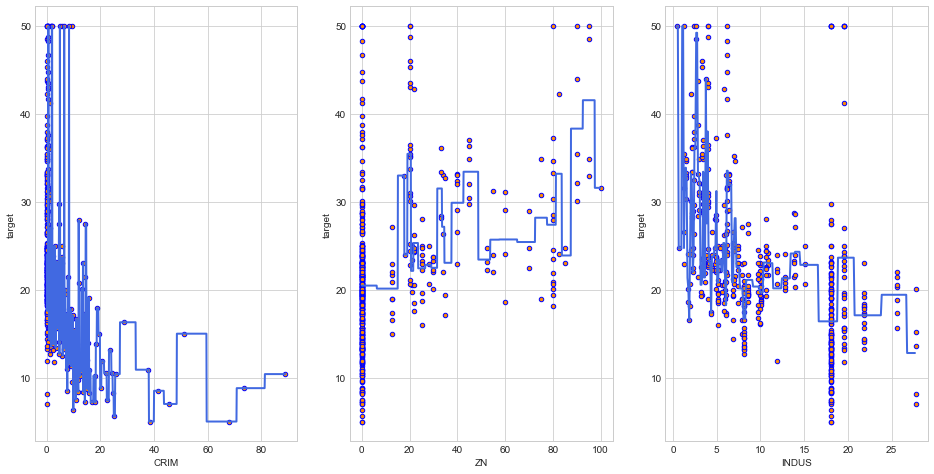

In [61]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0, 1, 2]):
    X = boston.data[:, pair].reshape(-1,1)
    y = boston.target
    
    model = DecisionTreeRegressor()
    model = model.fit(X,y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)
    
    plt.subplot(1, 3, pairidx+1)
    plt.scatter(X, y, s=20, edgecolors='b', c='darkorange', label='data')
    plt.plot(X_test, predict, color='royalblue', linewidth=2)
    plt.xlabel(boston.feature_names[pair])
    plt.ylabel('target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

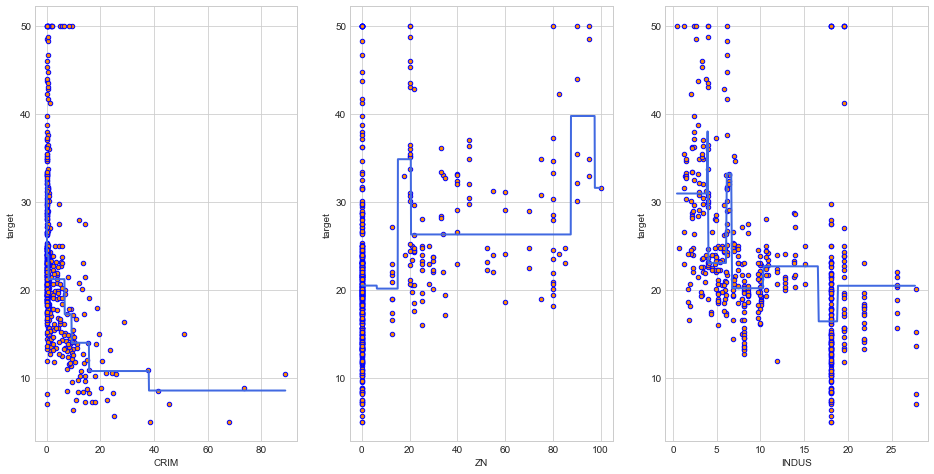

In [62]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0, 1, 2]):
    X = boston.data[:, pair].reshape(-1,1)
    y = boston.target
    
    model = DecisionTreeRegressor(max_depth=3)
    model = model.fit(X,y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)
    
    plt.subplot(1, 3, pairidx+1)
    plt.scatter(X, y, s=20, edgecolors='b', c='darkorange', label='data')
    plt.plot(X_test, predict, color='royalblue', linewidth=2)
    plt.xlabel(boston.feature_names[pair])
    plt.ylabel('target')

### 당뇨병 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [63]:
model = DecisionTreeRegressor()

In [64]:
cross_val_score(estimator=model,
               X=diabetes.data, y=diabetes.target,
               cv=5, n_jobs=multiprocessing.cpu_count(),
               verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


array([-0.39139609, -0.02354437, -0.02546785, -0.01014446, -0.19548666])

##### 전처리 후 학습

In [65]:
model = make_pipeline(StandardScaler(),
                     DecisionTreeRegressor())

In [66]:
cross_val_score(estimator=model,
               X=diabetes.data, y=diabetes.target,
               cv=5, n_jobs=multiprocessing.cpu_count(),
               verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


array([-0.22869223, -0.00644542, -0.25783051, -0.00712716, -0.19804714])

#### 학습된 결정 트리 시각화

In [67]:
model = DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)

DecisionTreeRegressor()

##### 텍스트를 통한 시각화

In [68]:
r = tree.export_text(model, feature_names=diabetes.feature_names)
print(r)

|--- s5 <= -0.00
|   |--- bmi <= 0.01
|   |   |--- s3 <= 0.02
|   |   |   |--- s1 <= 0.06
|   |   |   |   |--- sex <= 0.00
|   |   |   |   |   |--- bp <= -0.03
|   |   |   |   |   |   |--- age <= -0.05
|   |   |   |   |   |   |   |--- bp <= -0.09
|   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |--- bp >  -0.09
|   |   |   |   |   |   |   |   |--- bp <= -0.05
|   |   |   |   |   |   |   |   |   |--- s6 <= -0.03
|   |   |   |   |   |   |   |   |   |   |--- s2 <= -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- s2 >  -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- s6 >  -0.03
|   |   |   |   |   |   |   |   |   |   |--- value: [200.00]
|   |   |   |   |   |   |   |   |--- bp >  -0.05
|   |   |   |   |   |   |   |   |   |--- s2 <= -0.03
|   |   |   |   |   |   |   |   |   |   |--- value: [134.00]
|   |   |

##### plot_tree를 사용한 시각화

[Text(177.96474778188843, 212.26285714285714, 'X[8] <= -0.004\nmse = 5929.885\nsamples = 442\nvalue = 152.133'),
 Text(102.50057539942378, 201.90857142857143, 'X[2] <= 0.006\nmse = 3240.821\nsamples = 218\nvalue = 109.986'),
 Text(69.13662748821372, 191.5542857142857, 'X[6] <= 0.021\nmse = 2143.968\nsamples = 171\nvalue = 96.31'),
 Text(38.95623363017287, 181.2, 'X[4] <= 0.063\nmse = 2856.847\nsamples = 87\nvalue = 108.805'),
 Text(30.29685699319015, 170.84571428571428, 'X[1] <= 0.003\nmse = 2496.899\nsamples = 85\nvalue = 105.682'),
 Text(15.082661079099005, 160.49142857142857, 'X[3] <= -0.035\nmse = 2955.72\nsamples = 39\nvalue = 118.846'),
 Text(8.768988999476166, 150.13714285714286, 'X[0] <= -0.051\nmse = 2357.959\nsamples = 21\nvalue = 100.429'),
 Text(4.209114719748559, 139.78285714285715, 'X[3] <= -0.092\nmse = 2049.0\nsamples = 8\nvalue = 133.5'),
 Text(3.5075955997904664, 129.42857142857144, 'mse = 0.0\nsamples = 1\nvalue = 55.0'),
 Text(4.9106338397066525, 129.42857142857144,

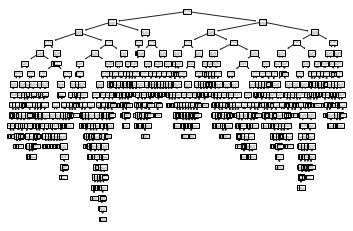

In [69]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

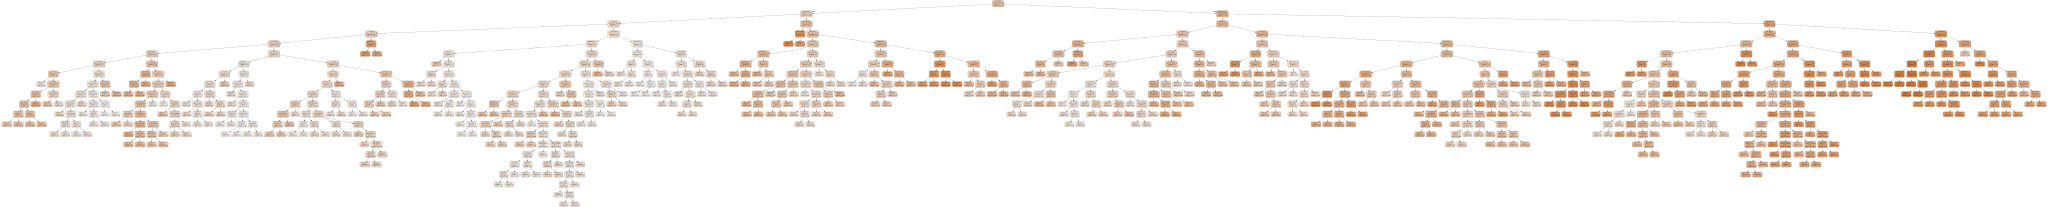

In [70]:
dot_data = tree.export_graphviz(decision_tree=model,
                        feature_names=diabetes.feature_names,
                        class_names='target',
                        filled=True, rounded=True,
                        special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

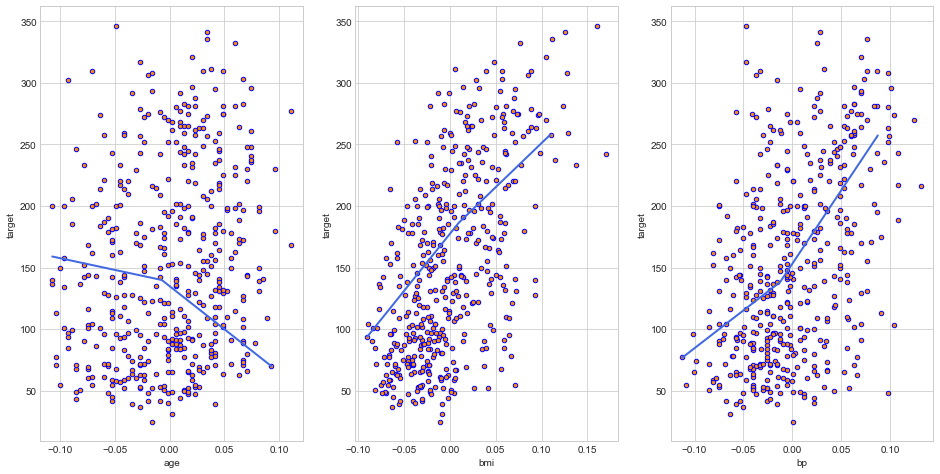

In [71]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0, 2, 3]):
    X = diabetes.data[:, pair].reshape(-1,1)
    y = diabetes.target
    
    model = DecisionTreeRegressor()
    model = model.fit(X,y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)
    
    plt.subplot(1, 3, pairidx+1)
    plt.scatter(X, y, s=20, edgecolors='b', c='darkorange', label='data')
    plt.plot(X_test, predict, color='royalblue', linewidth=2)
    plt.xlabel(diabetes.feature_names[pair])
    plt.ylabel('target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

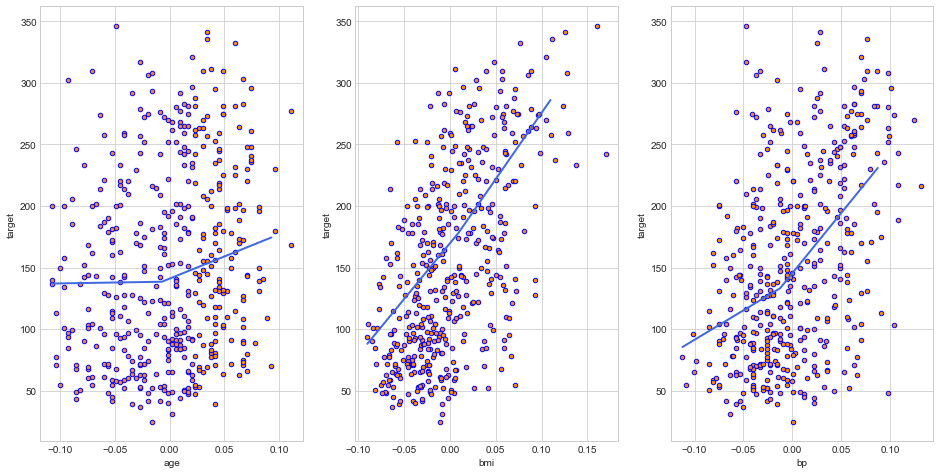

In [72]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0, 2, 3]):
    X = diabetes.data[:, pair].reshape(-1,1)
    y = diabetes.target
    
    model = DecisionTreeRegressor(max_depth=3)
    model = model.fit(X,y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)
    
    plt.subplot(1, 3, pairidx+1)
    plt.scatter(X, y, s=20, edgecolors='b', c='darkorange', label='data')
    plt.plot(X_test, predict, color='royalblue', linewidth=2)
    plt.xlabel(diabetes.feature_names[pair])
    plt.ylabel('target')

In [73]:
print("특성 중요도:\n{}".format(model.feature_importances_))

특성 중요도:
[1.]
